In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datenimport
Quelle der Daten: https://data.milwaukee.gov/dataset/property-sales-data

In [2]:
FILEPATH_2020 = os.path.join('..', 'input', 'armslengthsales_2020_valid.csv')
FILEPATH_2021 = os.path.join('..', 'input', 'armslengthsales_2021_valid.csv')
FILEPATH_2022 = os.path.join('..', 'input', 'armslengthsales_2022_valid.csv')

In [3]:
df_2020 = pd.read_csv(FILEPATH_2020)
df_2021 = pd.read_csv(FILEPATH_2021)
df_2022 = pd.read_csv(FILEPATH_2022)

In [4]:
#df = pd.concat([df_2020, df_2021, df_2022])
df = df_2022

## EDA

### Beschreibung und Analyse des Datensatzes
Der Datensatz beinhaltet Verkaufsdaten über Wohnhäuser, Eigentumswohnungen, Gewerbeimmobilien, Apartments und unbebaute Grundstücke. <br>
<br>
7146 Zeilen<br>
8168 fehlende Werte<br>
20 Variablen

```PropertyID``` - Enthält die eindeutige ID der Immobilie  
```PropType``` - Enthält den Typ der Immobilie - 6 verschiedene mit Anteil in %: 81,4% Residential (Wohnimmobilien), 13% Condominium (Eigentumswohnungen), 3% Large Apartment (Große Wohnungen), 2,6% Commercial (Gewerbeimmobilien), <0,1% Manufacturing (Produktionsstätten), <0,1% Exempt (Andere)  
```taxkey``` - Enthält die eindeutige Steuerliche Kennung der Immobilie  
```Address``` - Enthält die Adresse der Immobilie  
```CondoProject``` - Nur für Condominium (Eigentumswohnungen) relevant - enthält einen Projektnamen  
```District``` - Nummer des Districts (Stadtteil) von Milwaukee  
```nbhd``` - Nummer der 'Nachbarschaft' - vermutlich eine detaillierte Einteilung der Districts  
```Style``` - Enthält die 'Art' der Immobilie wie Ranch, Townhouse und Medical Clinic  
```Extwall``` - Beschreibt die Außenverkleidung der Immobilie wie Aluminium/Vinyl, Wood (Holz) oder Bricks (Ziegel)  
```Stories```- Enthält die Anzahl der Stockwerke der Immobilie  
```Year_Built``` - Enthält das Baujahr der Immobilie  
```Rooms``` - Enthält die Anzahl der Räume der Immobilie  
```FinishedSqft``` - Beschreibt die Gesamtfläche in Quadrratfuß der Immobilie an 1 Quardratfuß = 0,092903 Quadratmeter  
```Units``` - Enthält die Anzahl an Wohneineinheiten der Immobilie  
```Bdrms``` - Enthält die Anzahl an Schlafzimmern der Immobilie  
```Fbath``` - Enthält die Anzahl an 'Vollbädern' (Badezimmer mit Badewanne/Dusche) der Immobilie  
```Hbath``` - Enthält die Anzahl an 'Halbbädern' (Badezimmer ohne Badewanne/Dusche) der Immobilie  
```Lotsize``` - Enthält die Größe des Grundstücks, auf dem die Immobilie steht  
```Sale_date``` - Enthält das Datum, an dem die Immobilie verkauft wurde  
```Sale_prize```

### Fehlende Werte prüfen und entfernen

In [5]:
# Entfernen der irrelevanten Spalten
df = df.drop('PropertyID', axis=1)
df = df.drop('taxkey', axis=1)
df = df.drop('Address', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropType      7146 non-null   object 
 1   CondoProject  885 non-null    object 
 2   District      7146 non-null   int64  
 3   nbhd          7146 non-null   int64  
 4   Style         7125 non-null   object 
 5   Extwall       6220 non-null   object 
 6   Stories       7107 non-null   float64
 7   Year_Built    7135 non-null   float64
 8   Rooms         6703 non-null   float64
 9   FinishedSqft  7122 non-null   float64
 10  Units         7146 non-null   int64  
 11  Bdrms         6703 non-null   float64
 12  Fbath         7146 non-null   int64  
 13  Hbath         7146 non-null   int64  
 14  Lotsize       7146 non-null   int64  
 15  Sale_date     7146 non-null   object 
 16  Sale_price    7146 non-null   float64
dtypes: float64(6), int64(6), object(5)
memory usage: 949.2+ KB


In [7]:
df.nunique()

PropType           6
CondoProject     202
District          15
nbhd             459
Style             81
Extwall           18
Stories           13
Year_Built       155
Rooms             40
FinishedSqft    2386
Units             49
Bdrms             24
Fbath              8
Hbath              4
Lotsize         1670
Sale_date        313
Sale_price      1284
dtype: int64

In [8]:
df.isna().sum()

PropType           0
CondoProject    6261
District           0
nbhd               0
Style             21
Extwall          926
Stories           39
Year_Built        11
Rooms            443
FinishedSqft      24
Units              0
Bdrms            443
Fbath              0
Hbath              0
Lotsize            0
Sale_date          0
Sale_price         0
dtype: int64

In [9]:
df.isna().sum() / df.isna().count()

PropType        0.000000
CondoProject    0.876154
District        0.000000
nbhd            0.000000
Style           0.002939
Extwall         0.129583
Stories         0.005458
Year_Built      0.001539
Rooms           0.061993
FinishedSqft    0.003359
Units           0.000000
Bdrms           0.061993
Fbath           0.000000
Hbath           0.000000
Lotsize         0.000000
Sale_date       0.000000
Sale_price      0.000000
dtype: float64

In [10]:
# Prüfen, ob CondoProject nur für bestimmte PropTypes relevant ist
print(len(df.loc[df['Rooms'].isna()]))
df.loc[df['Rooms'].isna()].isna().sum()

443


PropType          0
CondoProject    442
District          0
nbhd              0
Style            21
Extwall          38
Stories          16
Year_Built       11
Rooms           443
FinishedSqft     24
Units             0
Bdrms           443
Fbath             0
Hbath             0
Lotsize           0
Sale_date         0
Sale_price        0
dtype: int64

In [11]:
# Prüfen, ob CondoProject nur bei einem bestimmten PropType gefüllt ist
df.loc[df['CondoProject'].notna()]['PropType'].value_counts()

PropType
Condominium    885
Name: count, dtype: int64

In [12]:
df = df.drop('CondoProject', axis=1)

In [13]:
# Umwandeln von District und nbhd in Objekte, da diese Spalten keine numerischen Features sind
df['District'] = df['District'].astype(object)
df['nbhd'] = df['nbhd'].astype(object)

### Hinzufügen von zusätzlichen Spalten

In [14]:
pd.to_datetime(df['Sale_date']).dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
7141    2022
7142    2022
7143    2022
7144    2022
7145    2022
Name: Sale_date, Length: 7146, dtype: int32

In [15]:
# Vollbäder und Halbbäder fehlen nie => können zu 'Bath' zusammengeführt werden
df['Bath'] = df['Fbath']+(df['Hbath']/2)
df = df.drop('Fbath', axis=1)
df = df.drop('Hbath', axis=1)

# Schlafzimmer (Bdrms) und Räume (Rooms) fehlen immer gemeinsam => können zu 'Total Rooms' zusammengeführt werden
df['Total_Rooms'] = df['Bdrms'] + df['Rooms']
df = df.drop('Bdrms', axis=1)
df = df.drop('Rooms', axis=1)

# Alter der Immobilie (Aktuelles Jahr - Baujahr)
df['Age'] = pd.to_datetime(df['Sale_date']).dt.year - df['Year_Built']
df = df.drop('Year_Built', axis=1)

### Verteilung von y (sale_price)

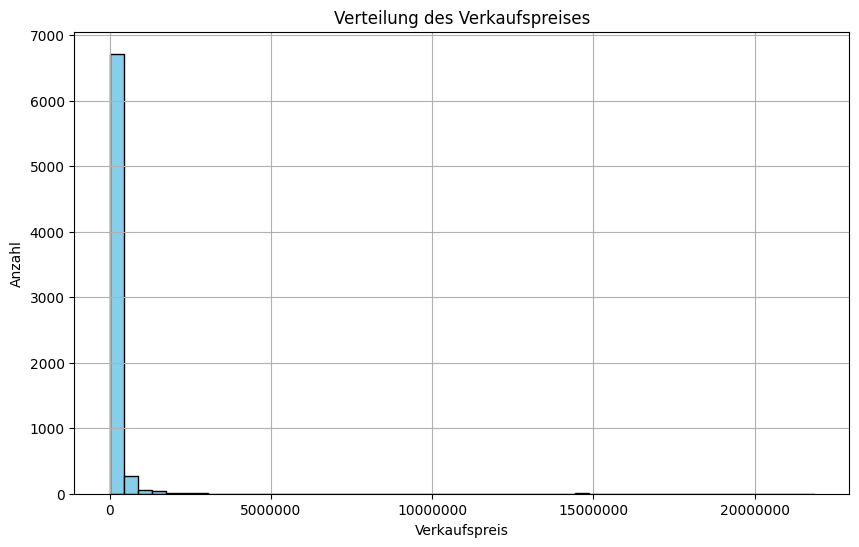

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sale_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Verteilung des Verkaufspreises')
plt.xlabel('Verkaufspreis')
plt.ylabel('Anzahl')
plt.ticklabel_format(style='plain', axis='x') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.grid(True)
plt.show()

### Feature - PropType

In [17]:
df['PropType'].value_counts()

PropType
Residential      5774
Condominium       887
Commercial        240
Lg Apartment      238
Manufacturing       6
Exempt              1
Name: count, dtype: int64

In [18]:
df[df['PropType'].isin(['Exempt', 'Manufacturing'])]

,PropType,District,nbhd,Style,Extwall,Stories,FinishedSqft,Units,Lotsize,Sale_date,Sale_price,Bath,Total_Rooms,Age
0,Manufacturing,9,6300,Service Building,Concrete Block,1.0,20600.0,6,0,2022-04-01,950000.0,0.0,NaN,44.0
89,Manufacturing,9,6300,Warehouse Building - 1 Story,Metal Siding,1.0,20860.0,1,0,2022-06-15,1525000.0,0.0,NaN,33.0
225,Manufacturing,9,6300,Special - to use this code see supv.,NaN,NaN,NaN,0,0,2022-10-06,820000.0,0.0,NaN,NaN
1771,Manufacturing,1,6300,Special - to use this code see supv.,NaN,NaN,NaN,0,0,2022-09-30,320000.0,0.0,NaN,NaN
1938,Exempt,7,24910,Commercial Exempt,NaN,NaN,NaN,0,0,2022-09-09,225000.0,0.0,NaN,NaN
4873,Manufacturing,8,6300,Warehouse Building - 1 Story,Precast Masonary,1.0,68276.0,2,0,2022-01-27,8025000.0,0.0,NaN,8.0
4876,Manufacturing,8,6300,Commercial Exempt,NaN,NaN,0.0,1,0,2022-04-04,7450000.0,0.0,NaN,NaN


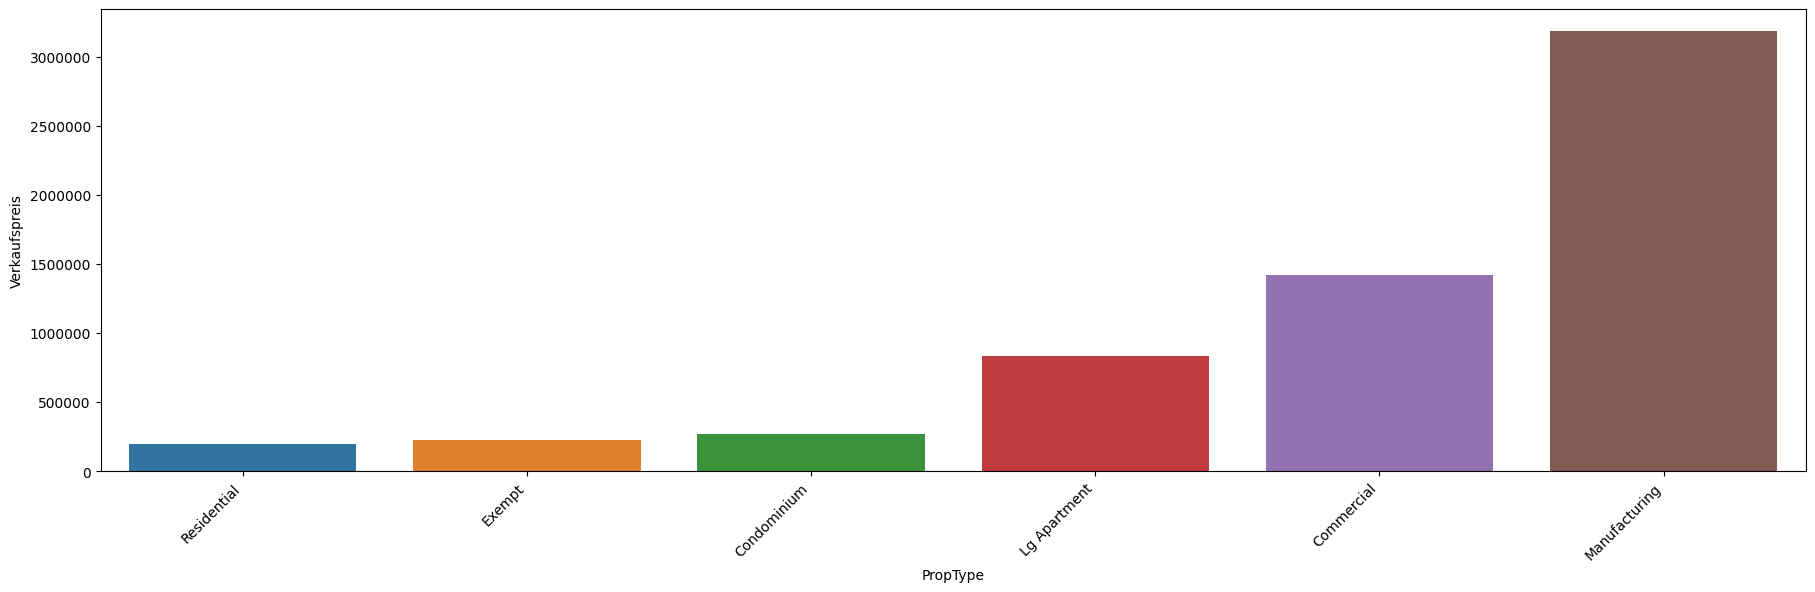

In [19]:
price_by_proptype = df.groupby('PropType')['Sale_price'].mean().reset_index()
price_by_proptype = price_by_proptype.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_proptype, x='PropType', y='Sale_price')
plt.xlabel('PropType')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Stories

In [20]:
df['Stories'].mean()

1.3848318559167019

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


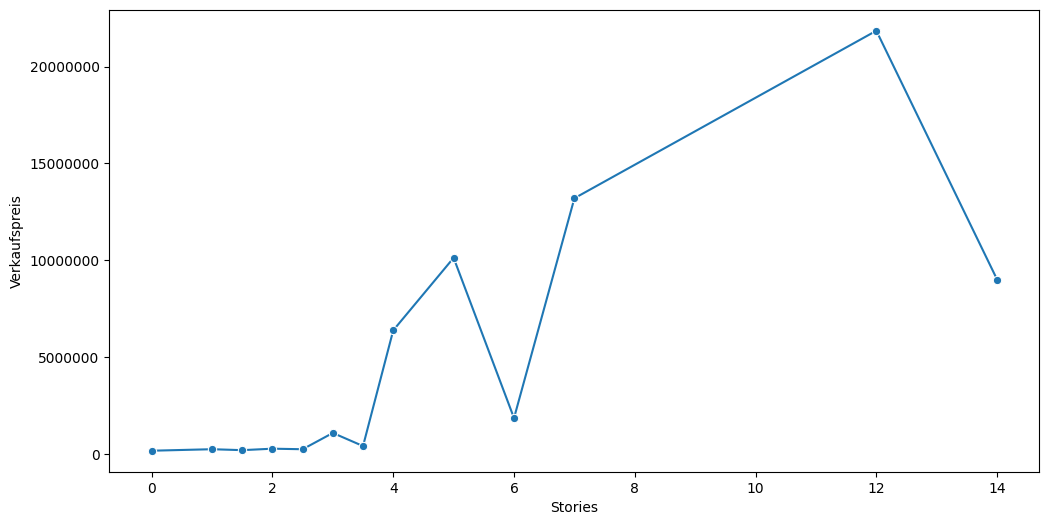

In [21]:
price_by_stories = df.groupby('Stories')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_stories, x='Stories', y='Sale_price', marker='o')
plt.xlabel('Stories')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Total_Rooms

In [22]:
df['Total_Rooms'].mean()

11.645233477547366

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


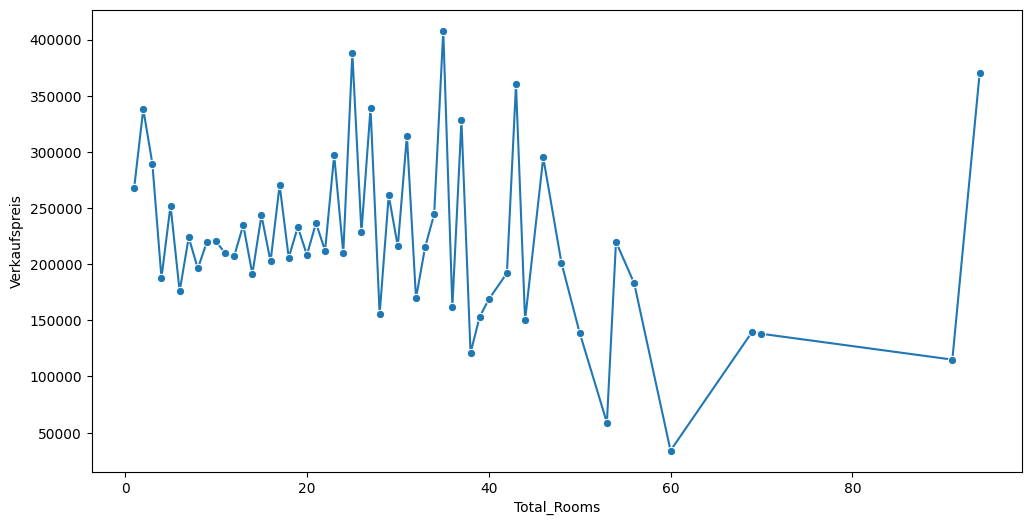

In [23]:
price_by_rooms = df.groupby('Total_Rooms')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_rooms, x='Total_Rooms', y='Sale_price', marker='o')
plt.xlabel('Total_Rooms')
plt.ylabel('Verkaufspreis')
plt.show()

### Feature - Units

In [24]:
df['Units'].mean()

2.0100755667506296

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


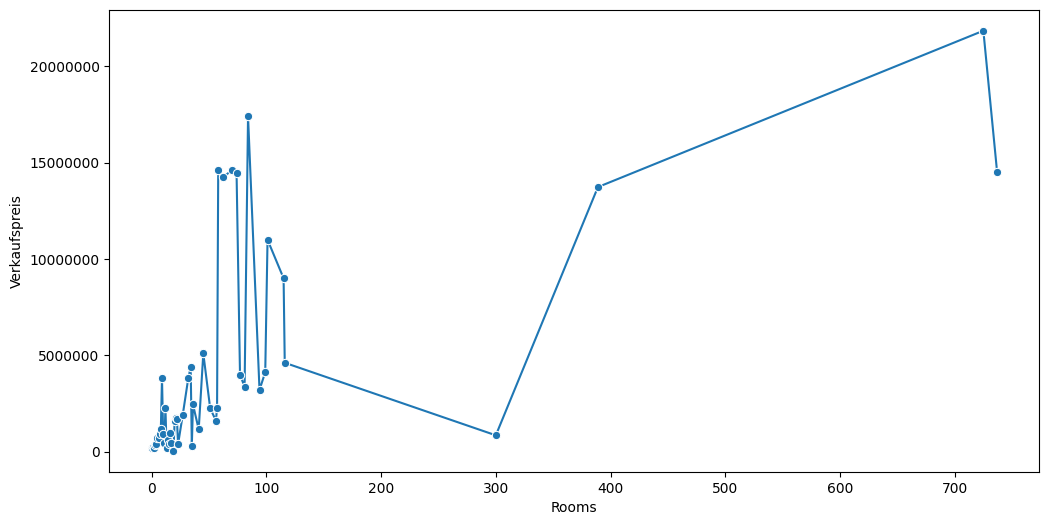

In [25]:
price_by_units = df.groupby('Units')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_units, x='Units', y='Sale_price', marker='o')
plt.xlabel('Rooms')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Bath

In [26]:
df['Bath'].mean()

1.5851525328855303

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


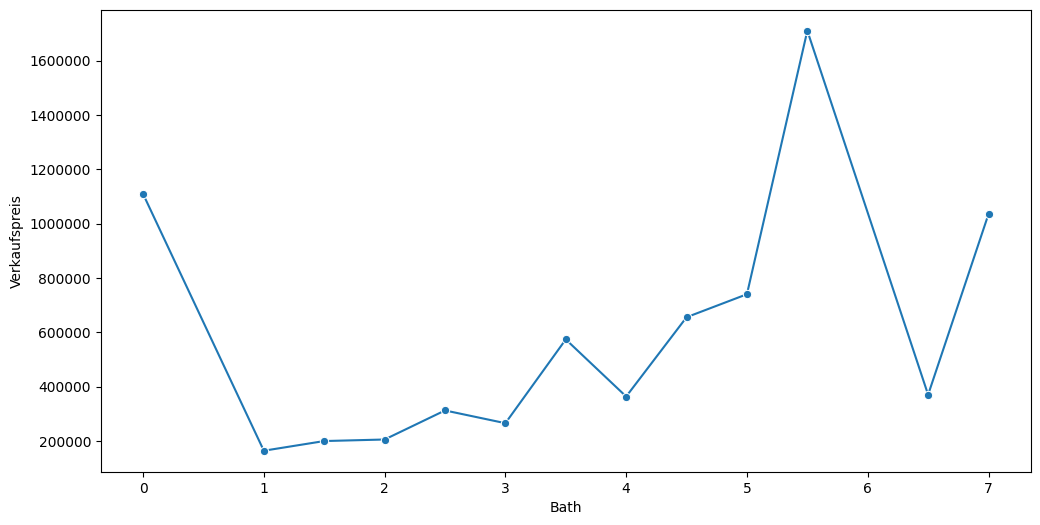

In [27]:
price_by_fbath = df.groupby('Bath')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_fbath, x='Bath', y='Sale_price', marker='o')
plt.xlabel('Bath')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - FinishedSqft

In [28]:
df['FinishedSqft'].mean()

2334.262707104746

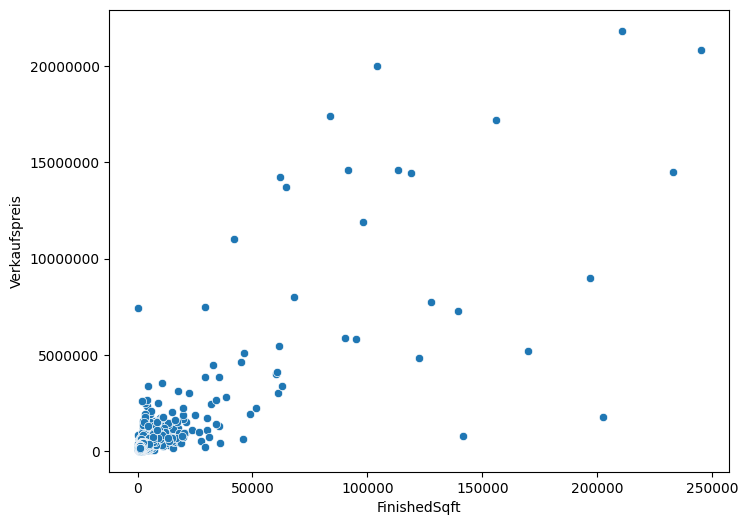

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='FinishedSqft', y='Sale_price')
plt.xlabel('FinishedSqft')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Lotsize

In [30]:
df['Lotsize'].mean()

6676.480128743353

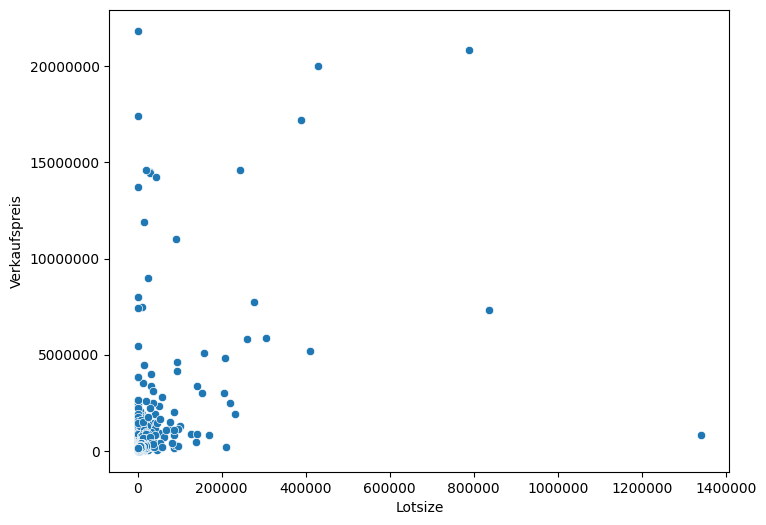

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='Lotsize', y='Sale_price')
plt.xlabel('Lotsize')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.ticklabel_format(style='plain', axis='x') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - District

In [32]:
df['District'].value_counts()

District
5     778
11    612
10    586
14    562
2     531
7     530
13    524
3     513
9     488
1     468
6     366
4     322
15    297
12    296
8     273
Name: count, dtype: int64

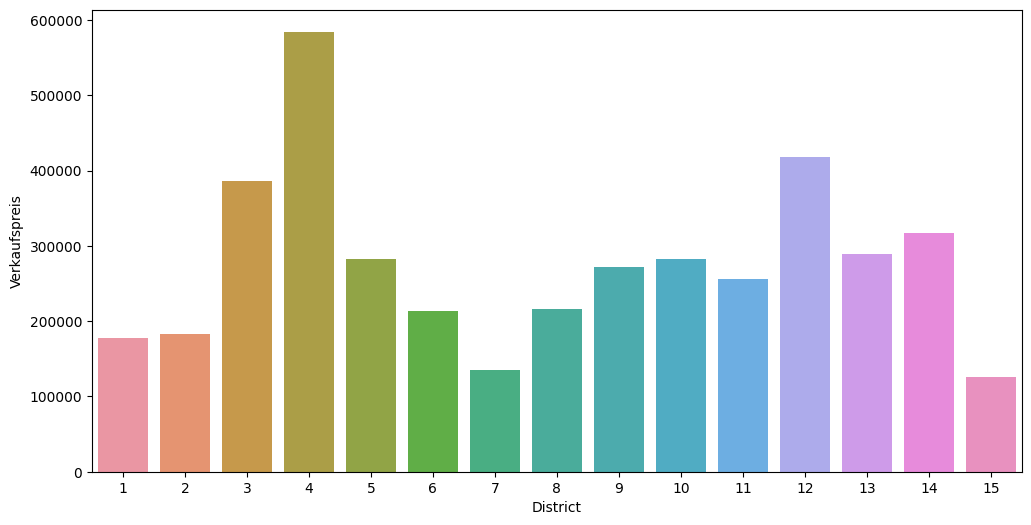

In [33]:
price_by_district = df.groupby('District')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(price_by_district, x='District', y='Sale_price')
plt.xlabel('District')
plt.ylabel('Verkaufspreis')
plt.show()

### Feature - Style

In [34]:
df['Style'].value_counts()

Style
Ranch                        1495
Cape Cod                     1006
Duplex O/S                    552
Milwaukee Bungalow            458
Res O/S A & 1/2               439
                             ... 
Medical Clinic                  1
Custard Stand, Drive-In         1
Office Building - Class A       1
Commercial Land                 1
Neighborhood Center             1
Name: count, Length: 81, dtype: int64

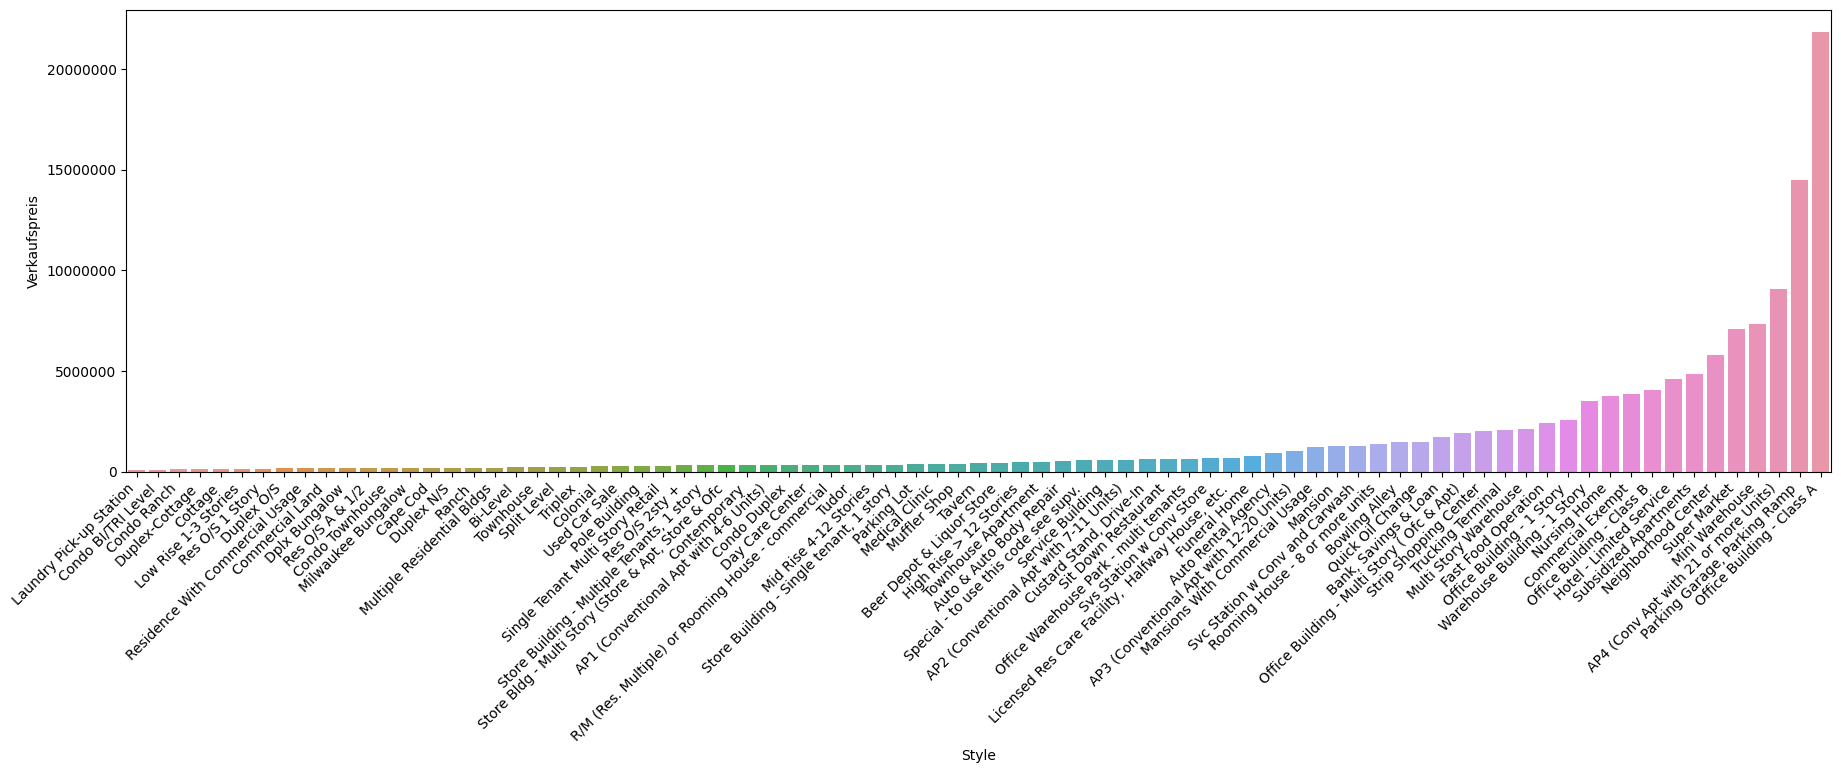

In [35]:
price_by_style = df.groupby('Style')['Sale_price'].mean().reset_index()
price_by_style = price_by_style.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_style, x='Style', y='Sale_price')
plt.xlabel('Style')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Extwall

In [36]:
df['Extwall'].value_counts()

Extwall
Aluminum/Vinyl             3468
Brick                      1408
Wood                        331
Asphalt/Other               313
Stone                       179
Masonry/Frame               154
Stucco                       93
Concrete Block               77
Fiber Cement/Hardiplank      49
Alum/Vynyl Siding            46
Masonary Frame               27
Block                        26
Precast Masonary             14
Metal Siding                 12
Prem Wood                    11
Other                        10
Brick on Frame                1
Brick on Block                1
Name: count, dtype: int64

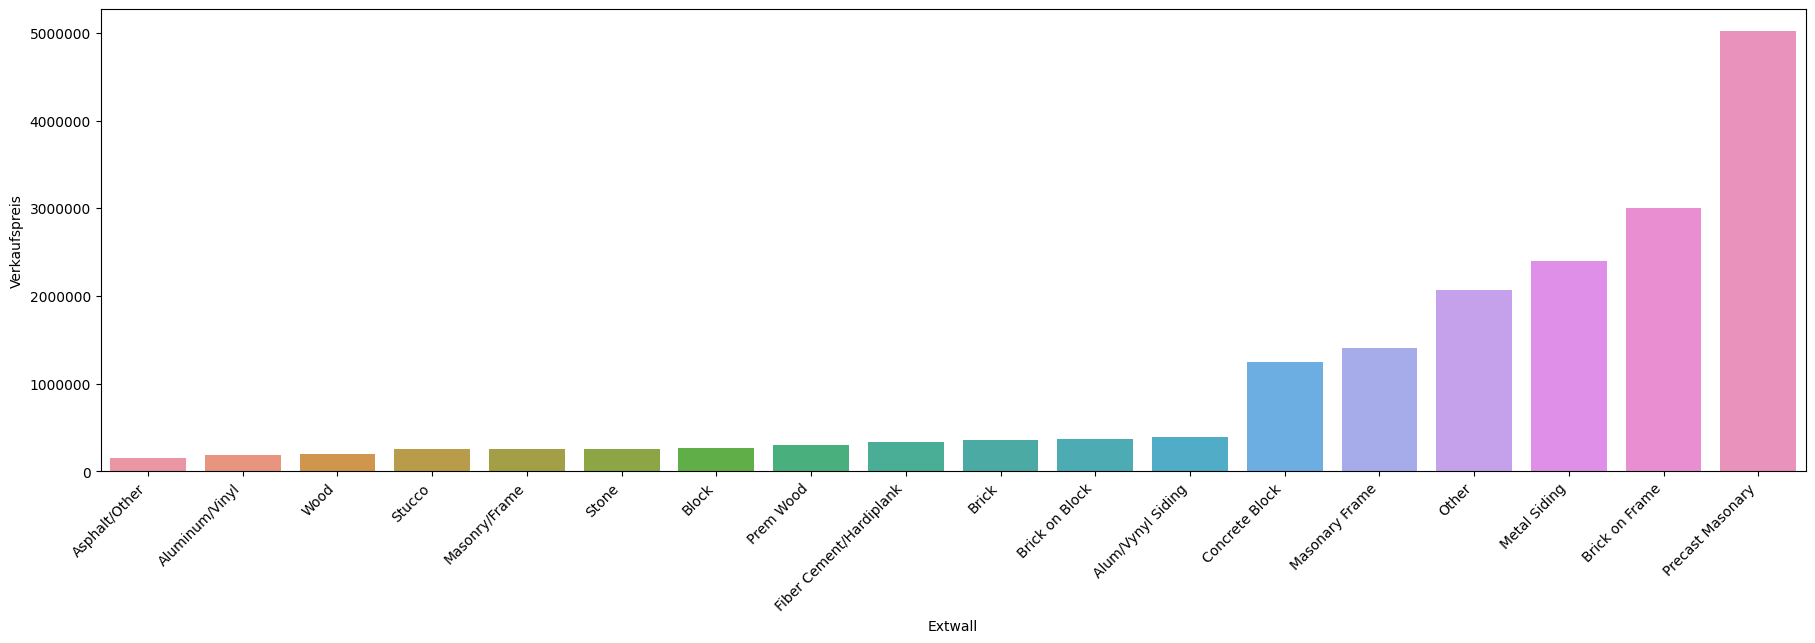

In [37]:
price_by_extwall = df.groupby('Extwall')['Sale_price'].mean().reset_index()
price_by_extwall = price_by_extwall.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_extwall, x='Extwall', y='Sale_price')
plt.xlabel('Extwall')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Age

In [38]:
df['Age'].mean()

85.82943237561318

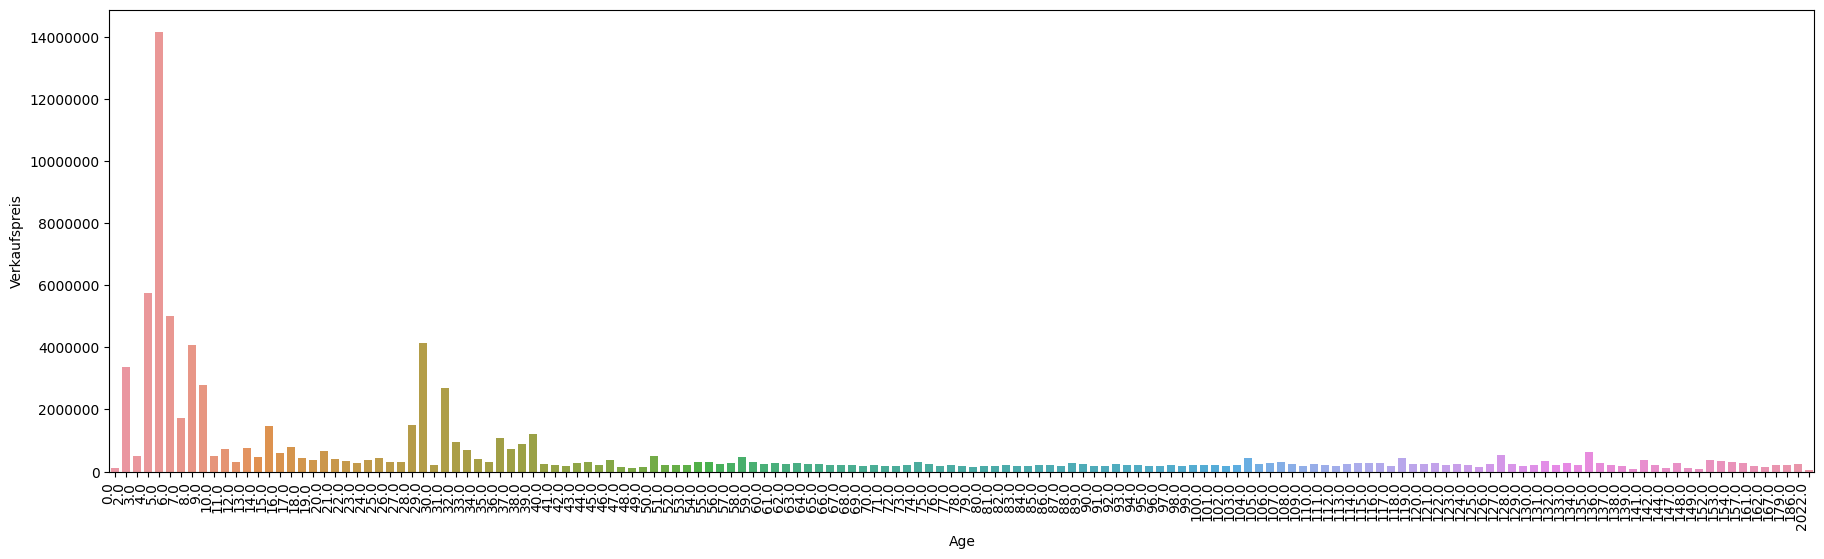

In [39]:
price_by_year_built = df.groupby('Age')['Sale_price'].mean().reset_index()
price_by_year_built = price_by_year_built.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_year_built, x='Age', y='Sale_price')
plt.xlabel('Age')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=90, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen

plt.show()

### Korrelation

In [40]:
corr = df.select_dtypes(exclude=['object']).corr().round(2)
corr

,Stories,FinishedSqft,Units,Lotsize,Sale_price,Bath,Total_Rooms,Age
Stories,1.00,0.34,0.32,0.00,0.28,0.19,0.34,-0.09
FinishedSqft,0.34,1.00,0.54,0.62,0.81,-0.16,0.35,-0.03
Units,0.32,0.54,1.00,0.06,0.55,-0.10,0.25,-0.01
Lotsize,0.00,0.62,0.06,1.00,0.42,-0.11,0.08,-0.01
Sale_price,0.28,0.81,0.55,0.42,1.00,-0.12,0.01,-0.04
Bath,0.19,-0.16,-0.10,-0.11,-0.12,1.00,0.43,-0.09
Total_Rooms,0.34,0.35,0.25,0.08,0.01,0.43,1.00,0.25
Age,-0.09,-0.03,-0.01,-0.01,-0.04,-0.09,0.25,1.00


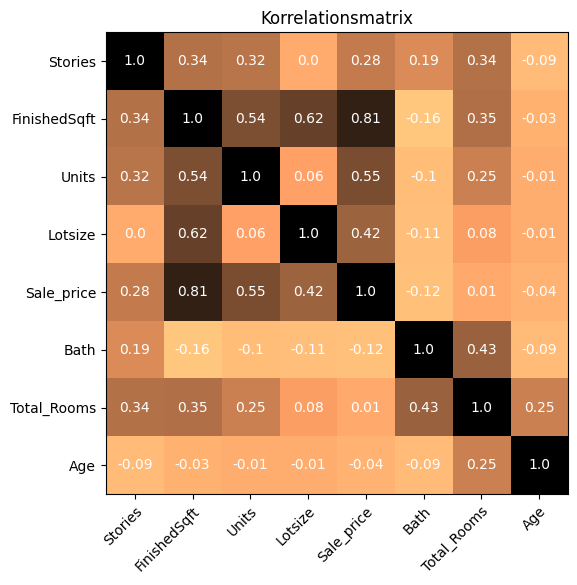

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(corr, cmap=plt.get_cmap('copper_r'))
ax.set_xticks(np.arange(len(corr)), labels=corr.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=corr.columns.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, corr.iloc[i, j], ha='center', va='center', color='w')

ax.set_title('Korrelationsmatrix')
plt.show()

### Analyse Ausreißer

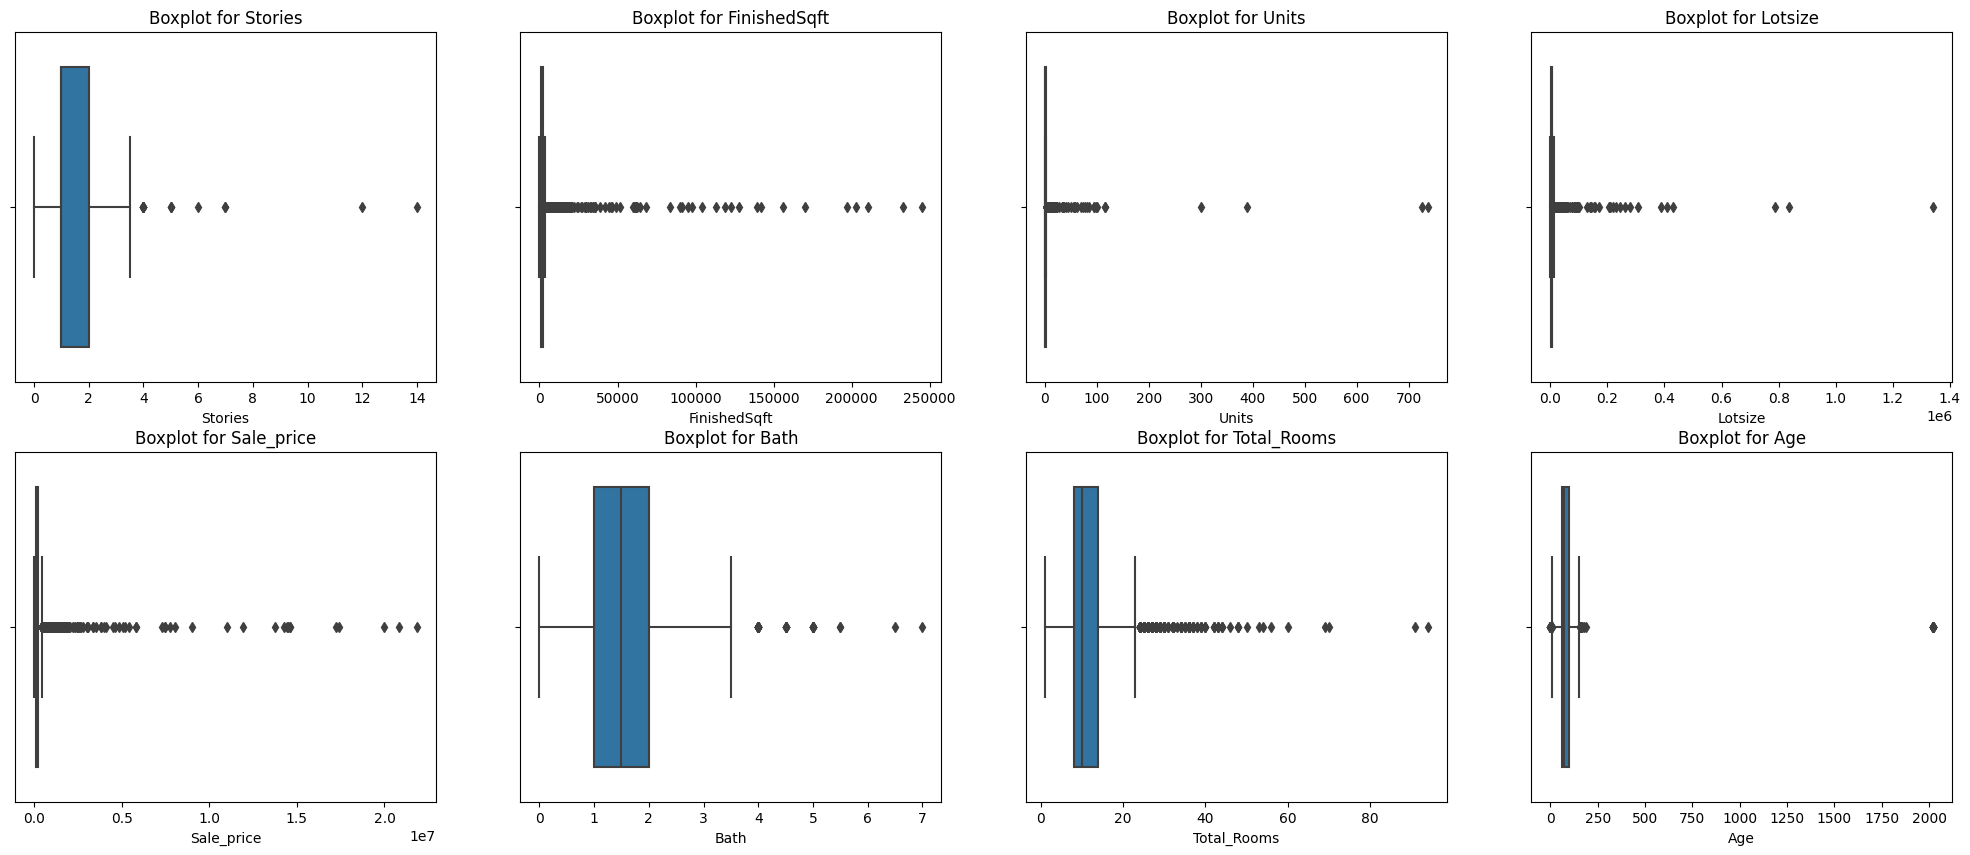

In [42]:
num_cols = df.select_dtypes(exclude=['object']).columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Boxplot for {col}')

plt.show()

In [43]:
df = df[df['Stories'] <= 8]
df = df[df['FinishedSqft'] <= 15000]
df = df[df['Units'] <= 15]
df = df[df['Lotsize'] <= 80000]
df = df[df['Bath'] <= 5]
df = df[df['Total_Rooms'] <= 40]
df = df[df['Age'] <= 250]

In [44]:
len(df)

6647

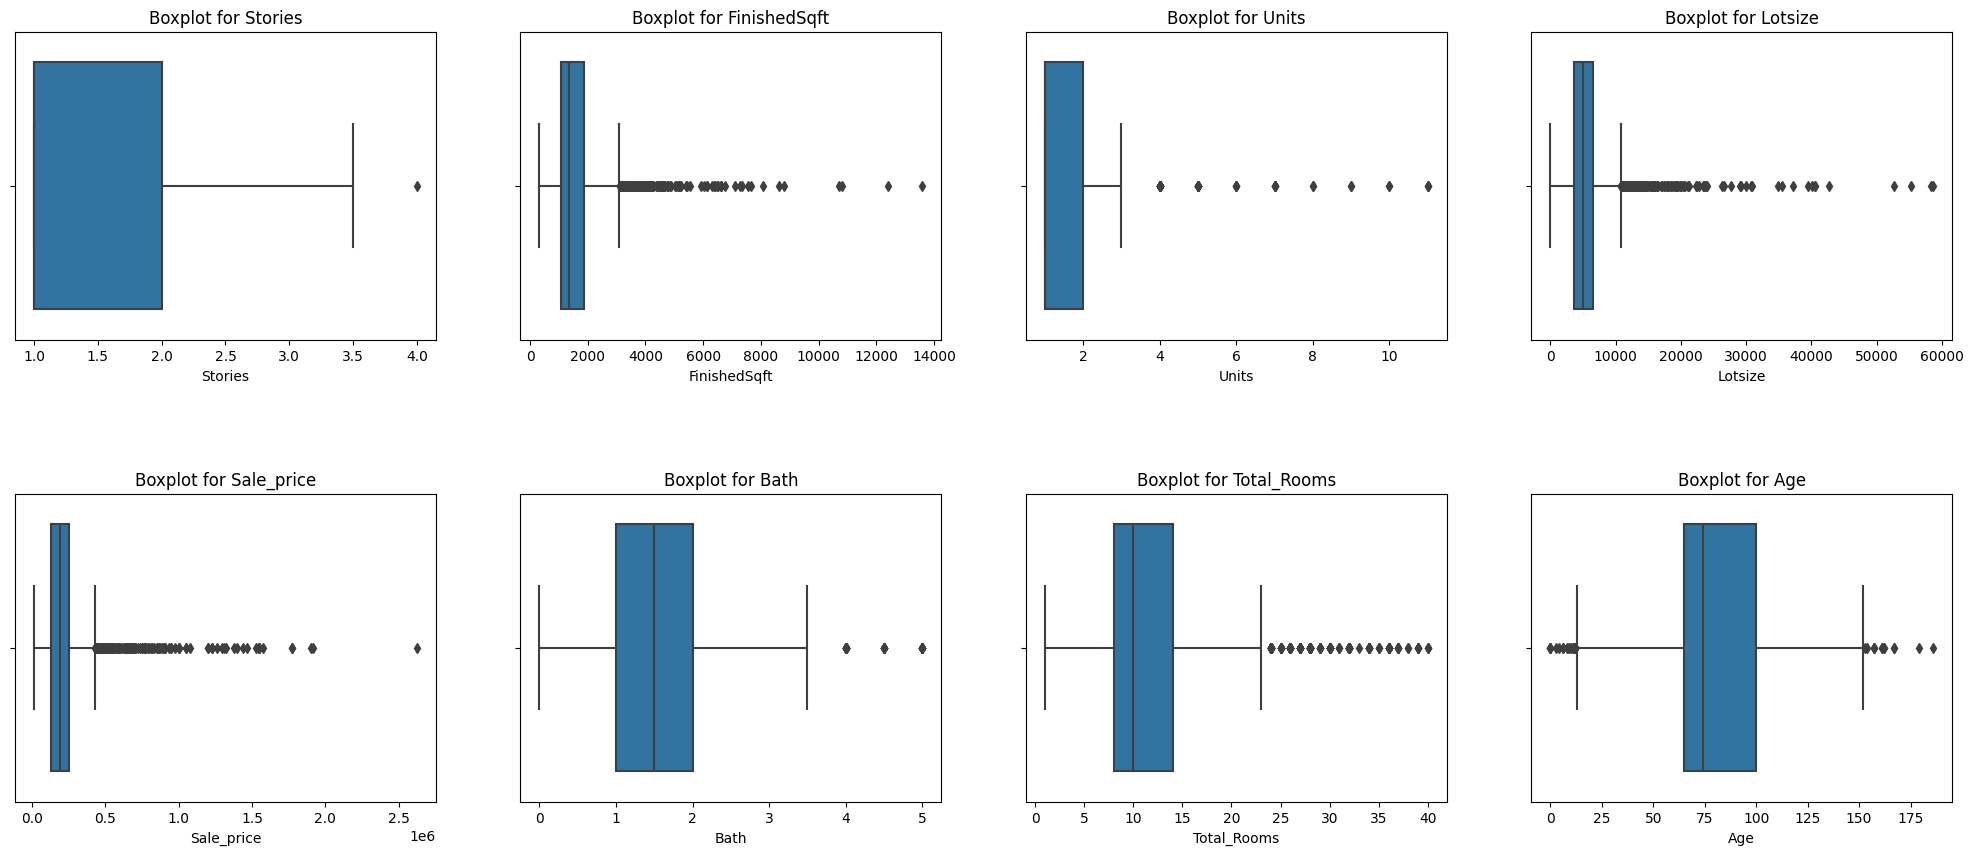

In [45]:
num_cols = df.select_dtypes(exclude=['object']).columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Boxplot for {col}')

plt.show()

### Fazit / Definition der Numerischen und Kategorischen Features für die Vorhersage
Folgende Features werden nicht verwendet:  
```PropertyID``` - Eindeutige ID, somit irrelevant für Vorhersagen  
```PropType``` - Zu starke Imbalance (Ungleichheit)  
```taxkey``` - Eindeutige ID, somit irrelevant für Vorhersagen  
```Address``` - Zu detaillierte Adresse, somit nicht verwendbar für Vorhersagen  
```CondoProject``` - Lediglich bei PropType 'Condominium' gefüllt  
```Style``` - Zu starke Imbalance (Ungleichheit)  
```Year_Built``` - Durch Alter der Immobilie ('Age') ersetzt  
```Rooms``` und ```Bdrms``` - Zusammengeführt zu 'Total_Rooms'  
```Fbath``` und ```Hbath``` - Zusammengeführt zu 'Bath'  
```Sale_date``` - Datum ist irrelevant, da lediglich Daten aus einem Jahr verwendet werden  

In [46]:
num_features = ['Stories', 'Age', 'Total_Rooms', 'FinishedSqft', 'Units', 'Bath', 'Lotsize']
cat_features = ['District', 'nbhd', 'Extwall']